<a href="https://colab.research.google.com/github/Rajalakshmi1910/Project1/blob/main/Rajalakshmi_mcdonald_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library
!pip install bioinfokit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import bioinfokit as bio

import seaborn as sns

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)


COLLECTING DATA

In [ ]:
#Load the data
df=pd.read_csv('/content/mcdonalds.csv')

EXPLORING DATA

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [ ]:
list(df.columns)

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [ ]:
df.shape


(1453, 15)

In [ ]:
df.nunique()

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

In [ ]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [ ]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [ ]:
#insights of the data for all dataset

df.describe(include='all')


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [ ]:
#count of missing values.
df.isna().sum()
df.isnull().sum()


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

convert categorical column to numeric


In [ ]:
df['yummy'].value_counts()


Yes    803
No     650
Name: yummy, dtype: int64

In [ ]:
df['convenient'].value_counts()


Yes    1319
No      134
Name: convenient, dtype: int64

In [ ]:
df['fattening'].value_counts()


Yes    1260
No      193
Name: fattening, dtype: int64

In [ ]:
df['greasy'].value_counts()


Yes    765
No     688
Name: greasy, dtype: int64

In [ ]:
df['fast'].value_counts()


Yes    1308
No      145
Name: fast, dtype: int64

In [ ]:
df['cheap'].value_counts()


Yes    870
No     583
Name: cheap, dtype: int64

In [ ]:
df['tasty'].value_counts()


Yes    936
No     517
Name: tasty, dtype: int64

In [ ]:
df['expensive'].value_counts()


No     933
Yes    520
Name: expensive, dtype: int64

In [ ]:
df['healthy'].value_counts()


No     1164
Yes     289
Name: healthy, dtype: int64

In [ ]:
df['disgusting'].value_counts()


No     1100
Yes     353
Name: disgusting, dtype: int64

In [ ]:
df['VisitFrequency'].value_counts()


Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

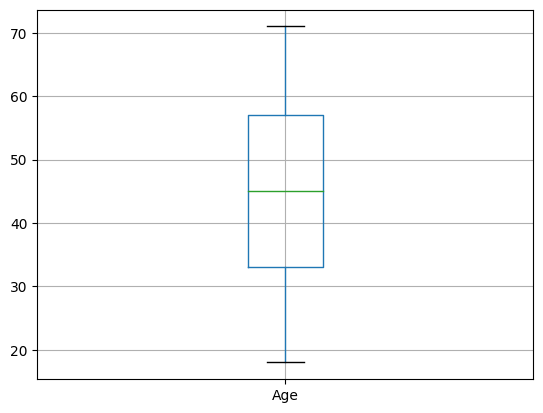

In [ ]:
#Boxplot to understand the distribution of each varibale
df.boxplot()
plt.show()

In [ ]:
#Understand the correlation of variables
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
#Histogram of yummy
plt.hist(data=df,x='yummy')
plt.show()

In [ ]:
#Histogram of convenient
plt.hist(data=df,x='convenient')
plt.show()

In [ ]:
#Histogram of spicy
plt.hist(data=df,x='spicy')
plt.show()

In [ ]:
#Histogram of fattening
plt.hist(data=df,x='fattening')
plt.show()

In [ ]:
#Histogram of greasy
plt.hist(data=df,x='greasy')
plt.show()

In [ ]:
#Histogram of fast
plt.hist(data=df,x='fast')
plt.show()

NameError: ignored

In [ ]:
#Histogram of cheap
plt.hist(data=df,x='cheap')
plt.show()

In [ ]:
#Histogram of tasty
plt.hist(data=df,x='tasty')
plt.show()

In [ ]:
#Histogram of expensive
plt.hist(data=df,x='expensive')
plt.show()

In [ ]:
#Histogram of healthy
plt.hist(data=df,x='healthy')
plt.show()

In [ ]:
#Histogram of disgusting
plt.hist(data=df,x='disgusting')
plt.show()

In [ ]:
#Histogram of VisitFrequency
plt.hist(data=df,x='VisitFrequency')
plt.show()

In [ ]:
#Histogram of Gender
plt.hist(data=df,x='Gender')
plt.show()

ENCODING CATEGORICAL INTO MATRIX FORM

In [ ]:
mtx=df.iloc[:, 0:11].applymap(lambda x:1 if x=="Yes" else 0)


In [ ]:
mtx

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


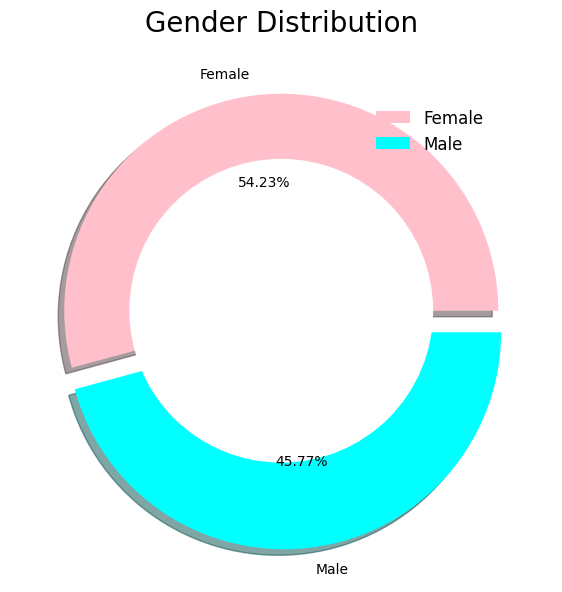

In [ ]:
# Customer segmentation - based on socio-demographs (Age & Gender)

# Gender
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'cyan']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')

# Add a title and adjust the position
plt.title('Gender Distribution', fontsize = 20)
plt.subplots_adjust(top=1.2)

plt.axis('off')

# Add a shadow effect to the chart

plt.gca().set_aspect('equal')
plt.gca().set_facecolor('white')
plt.gca().add_artist(plt.Circle((0,0),0.7,fc='white'))
plt.rcParams['text.color'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.gca().set_axisbelow(True)

# Add a legend with custom labels and adjust the position
legend_labels = ['Female', 'Male']
plt.legend(labels=legend_labels, loc='upper right', bbox_to_anchor=(0.9, 0.9), frameon=False, prop={'size': 12})

# Display the chart
plt.show()


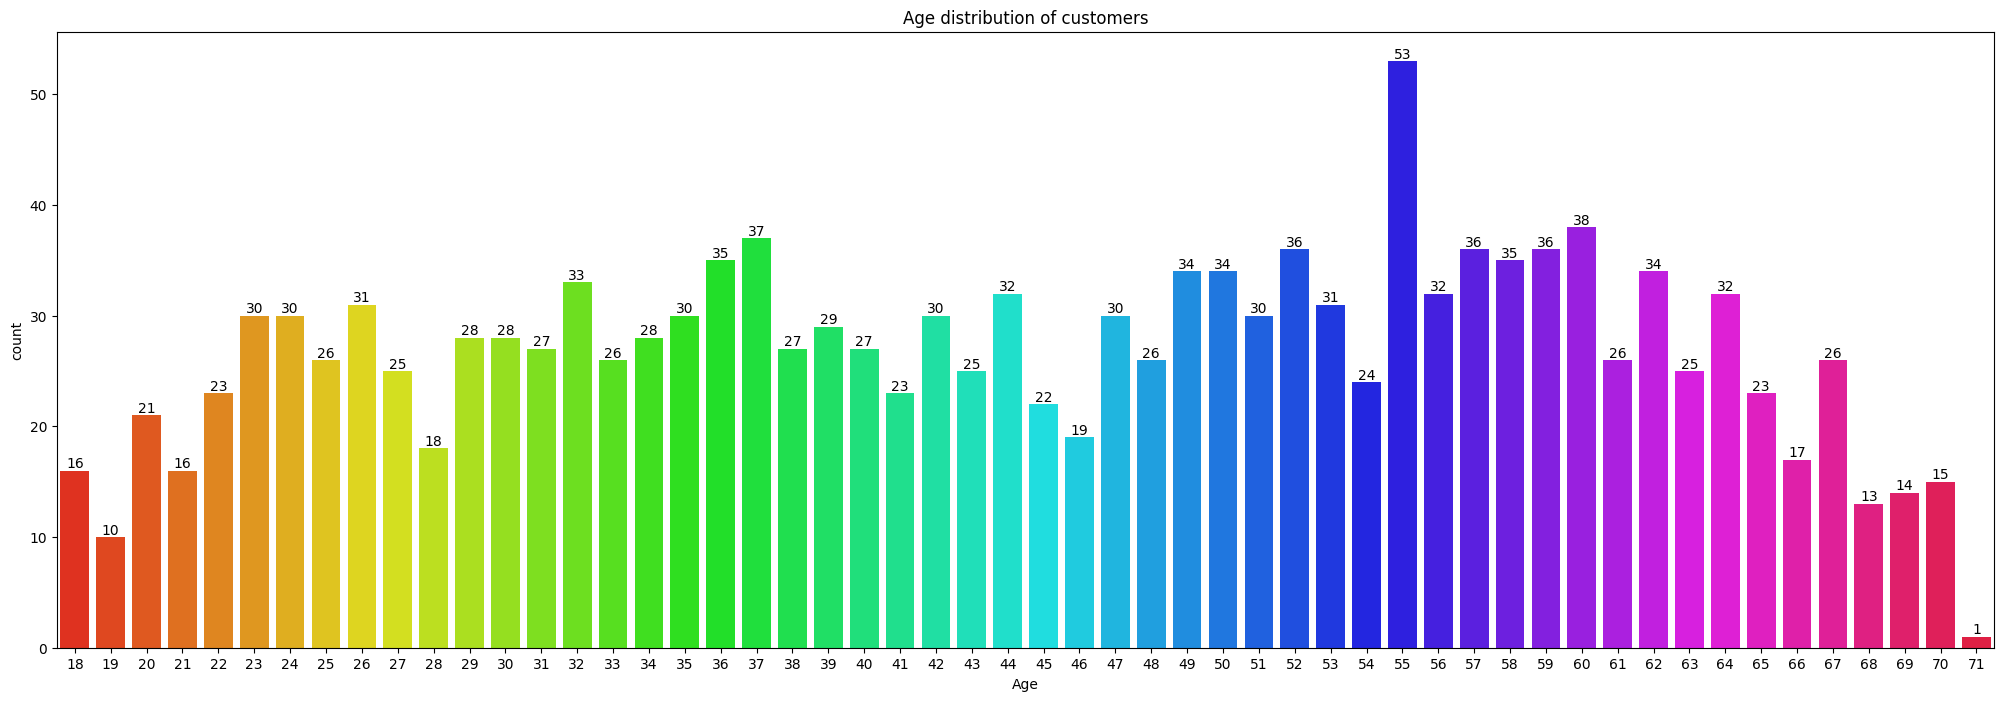

In [ ]:
#Age

plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df['Age'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()
# Mcdonalds recieve more customers of age between 50-60 and 35-40.


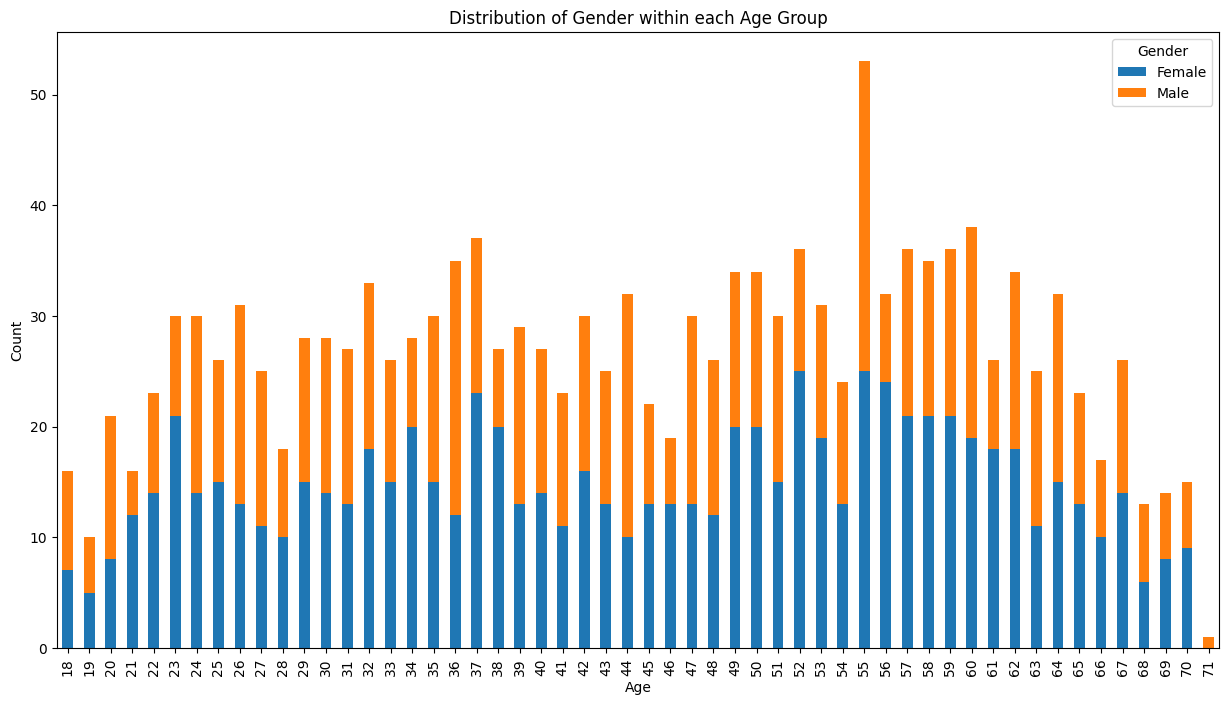

In [ ]:
# Group the data by Age and Gender
age_gender = df.groupby(['Age', 'Gender']).size().reset_index(name='Count')

# Pivot the data to create a matrix of Age vs Gender counts
age_gender_pivot = age_gender.pivot(index='Age', columns='Gender', values='Count').fillna(0)

# Create a stacked bar chart
ax = age_gender_pivot.plot(kind='bar', stacked=True, figsize=(15,8))

# Add axis labels and a title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Distribution of Gender within each Age Group')

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Female', 'Male'], title='Gender')
plt.show()

# Mcdonalds recieve more customers of age between 50-60 and 35-40.


In [ ]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


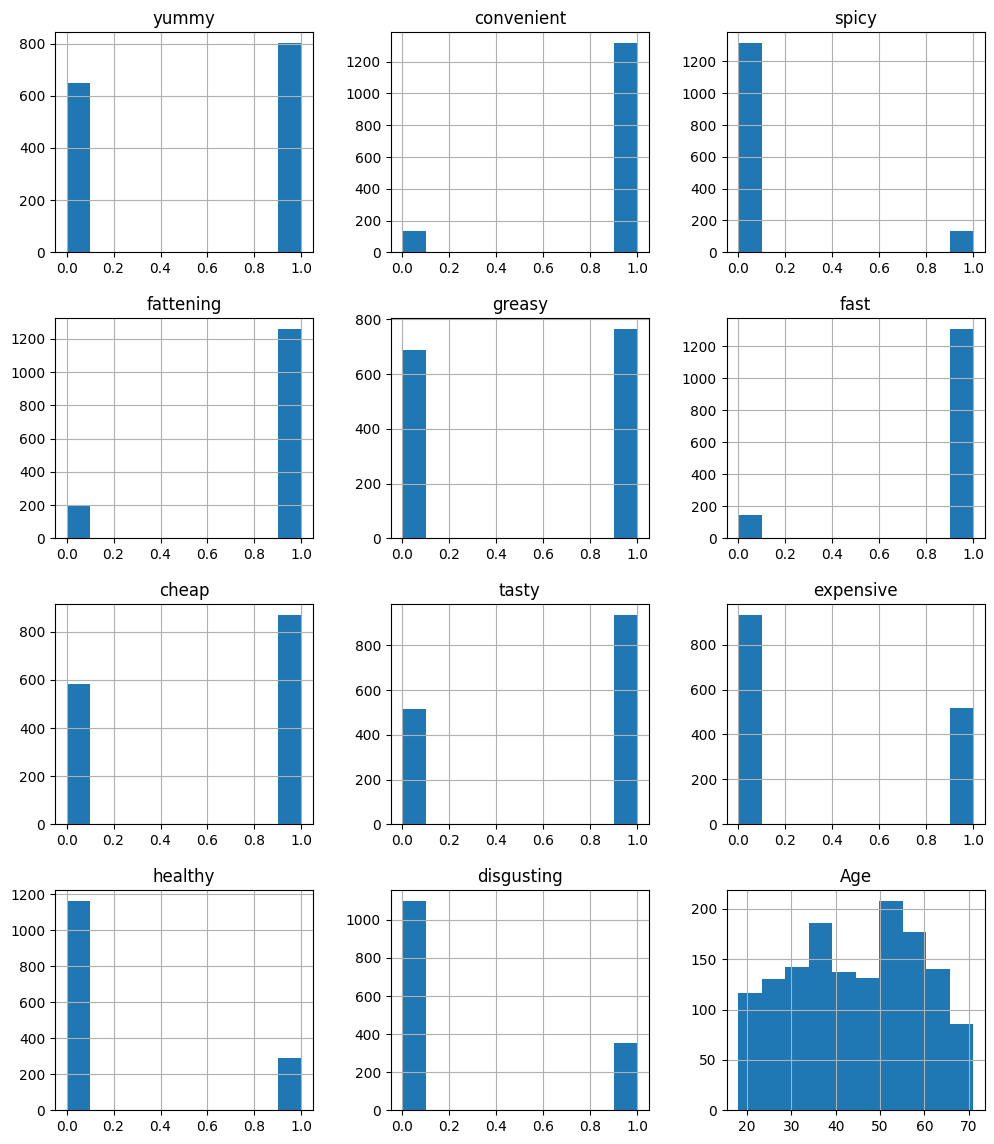

In [ ]:
#Histogram of the each attributes

plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()


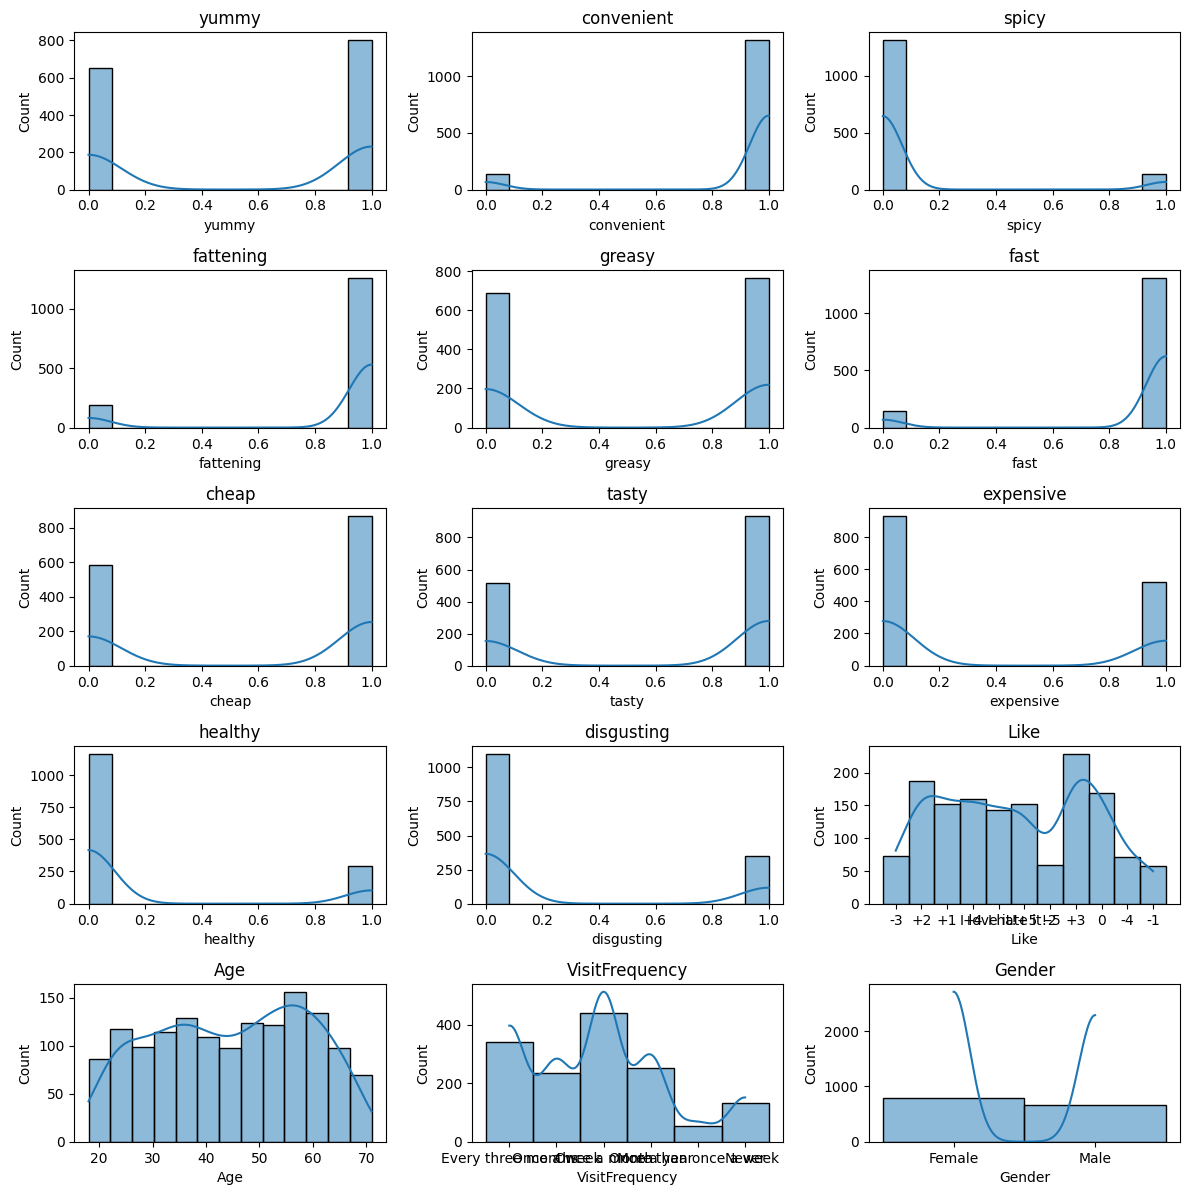

In [ ]:
plt.figure(figsize=(12,14))
for i, col in enumerate(df.columns):
    plt.subplot(6, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
# calculating mean
col_mean= np.round(mtx.mean(), 2)
print(col_mean)


In [ ]:
#Considering only the 11 cols and converting it into array

x = df.loc[:,cat].values
x


array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [ ]:
#Principal component analysis

from sklearn import preprocessing
pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [ ]:
#Proportion of Variance (from PC1 to PC11)
pca.explained_variance_ratio_


array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)


array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

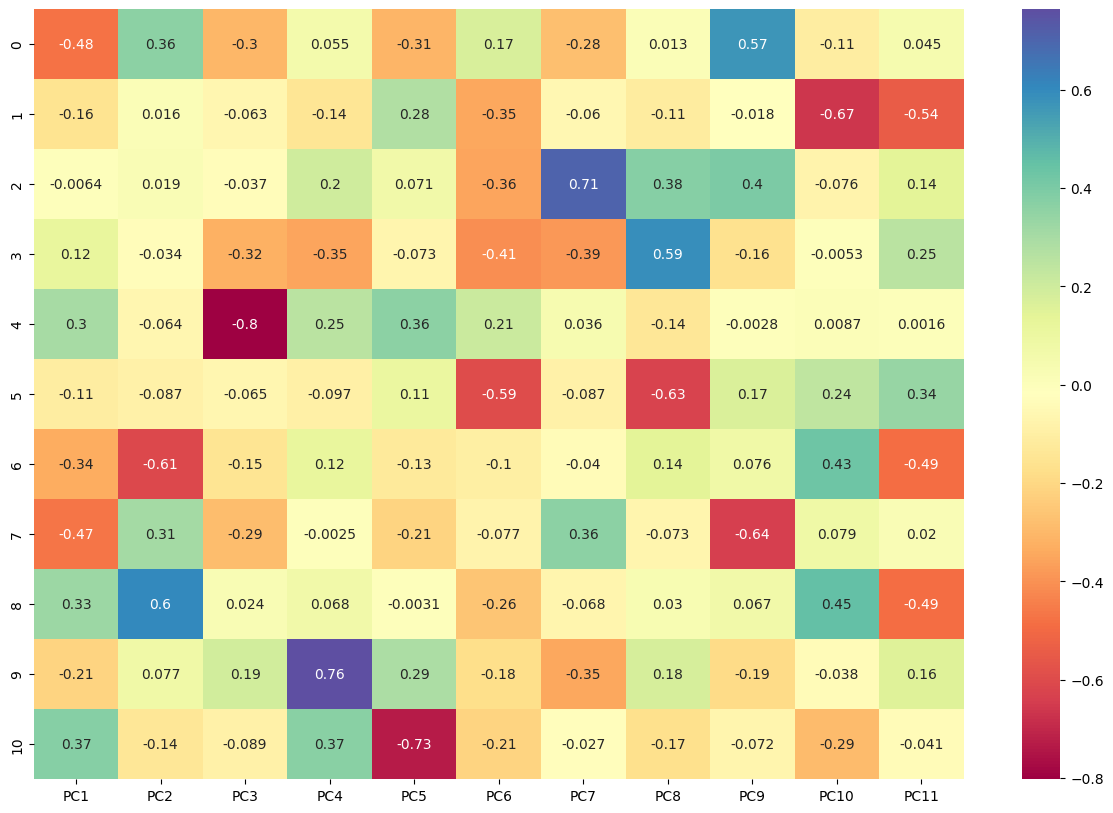

In [ ]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (15,10)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()


In [ ]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(mtx, rowvar=False)
print(cov_matrix)


[[ 0.24739828  0.0365393   0.00126697 -0.01469601 -0.03772522  0.01593265
   0.02561623  0.16371893 -0.01472303  0.04909383 -0.08959046]
 [ 0.0365393   0.08377556  0.00243962  0.00358193 -0.01546103  0.02109343
   0.02151102  0.04016578 -0.02275761  0.01146862 -0.04231769]
 [ 0.00126697  0.00243962  0.08489702 -0.00408768  0.00784877  0.00177129
   0.00245763  0.00853369  0.00642444  0.01236209  0.00410427]
 [-0.01469601  0.00358193 -0.00408768  0.11526451  0.05414181  0.00464177
  -0.00443464 -0.01423719  0.01451163 -0.0458764   0.02127308]
 [-0.03772522 -0.01546103  0.00784877  0.05414181  0.24946961 -0.0087176
  -0.01794236 -0.03911922  0.03527659 -0.04211956  0.06897148]
 [ 0.01593265  0.02109343  0.00177129  0.00464177 -0.0087176   0.08989665
   0.03706637  0.02094128 -0.02899956  0.00402227 -0.01774992]
 [ 0.02561623  0.02151102  0.00245763 -0.00443464 -0.01794236  0.03706637
   0.24041169  0.0327545  -0.16966654  0.02545318 -0.02642059]
 [ 0.16371893  0.04016578  0.00853369 -0.0

In [ ]:
# Step 4: Eigenvalue and Eigenvector Calculation for transformation
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# print(eigenvalues, eigenvectors)


In [ ]:
# Step 5: Sort Eigenvalues to get the most relevant feature
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


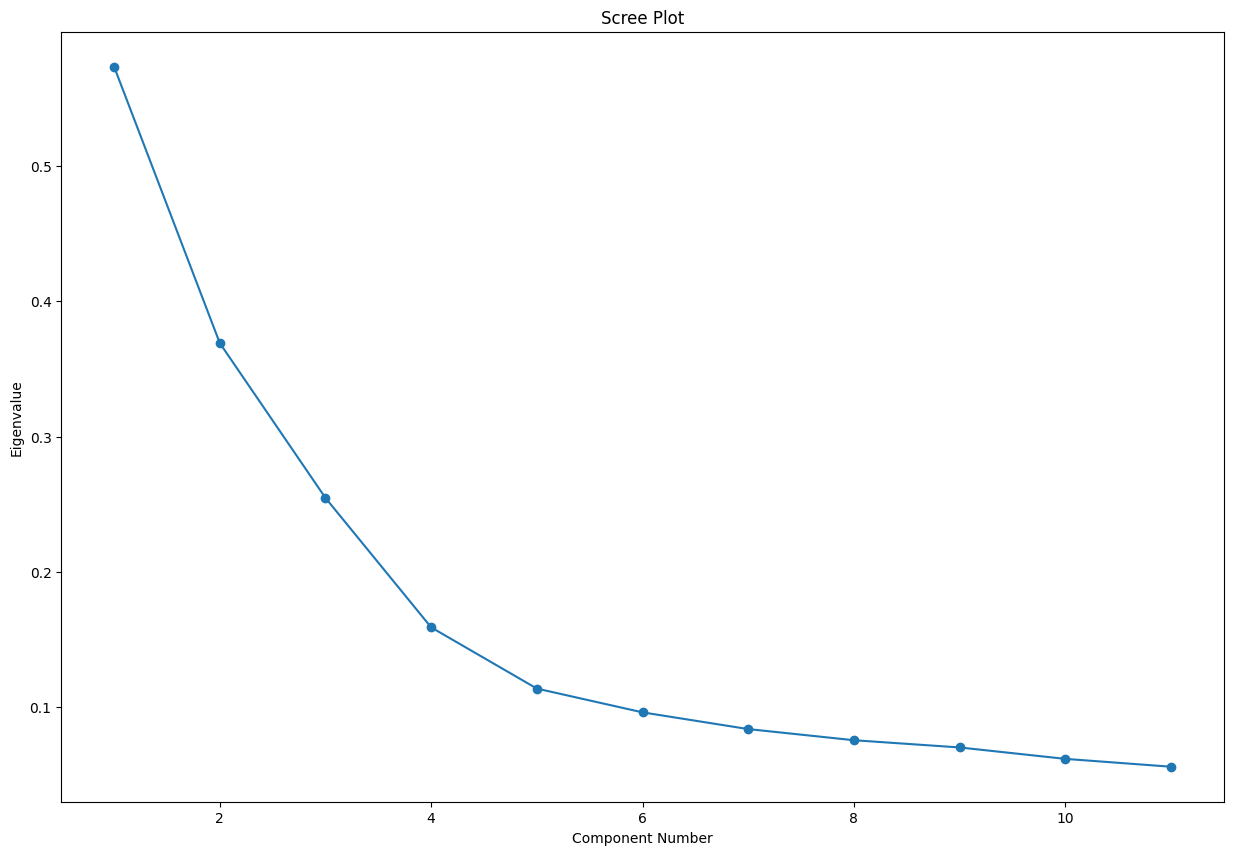

In [ ]:
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()


Using KMeans


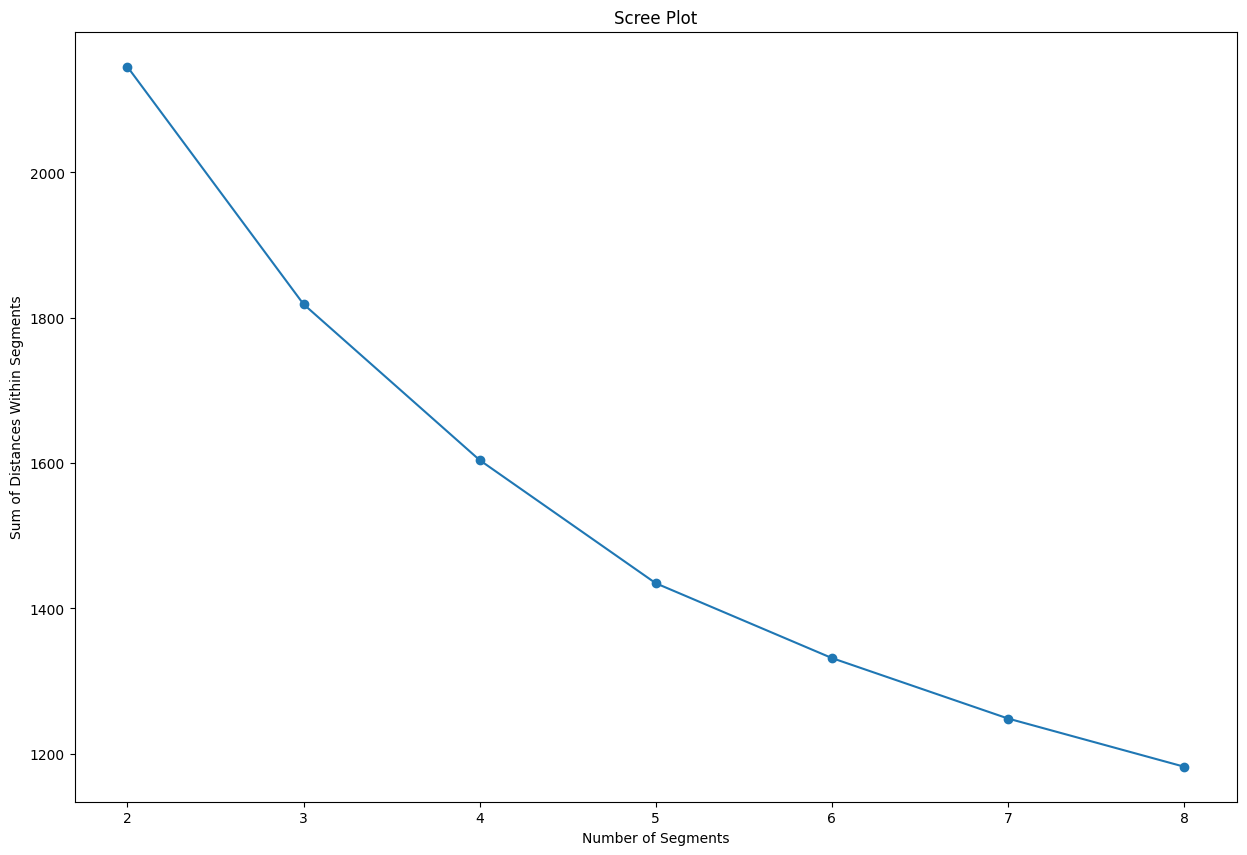

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Set the random seed
np.random.seed(1234)

# Create a dataset MD.x (assuming you have your data loaded)

# Perform k-Means clustering for 2 to 8 segments with 10 random restarts
n_clusters_range = range(2, 9)
n_restarts = 10
segmentations = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_restarts, random_state=1234)
    kmeans.fit(mtx)
    segmentations.append(kmeans)

# Relabel segment numbers to ensure consistency
def relabel_clusters(kmeans_model):
    labels = kmeans_model.labels_
    cluster_centers = kmeans_model.cluster_centers_
    new_labels, _ = pairwise_distances_argmin_min(cluster_centers, mtx)
    return new_labels

relabelled_segmentations = [relabel_clusters(kmeans) for kmeans in segmentations]

# Step 5: Extracting Segments - Plot a scree plot to determine the optimal number of segments
inertia_values = [kmeans.inertia_ for kmeans in segmentations]

plt.plot(n_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Distances Within Segments')
plt.title('Scree Plot')
plt.show()



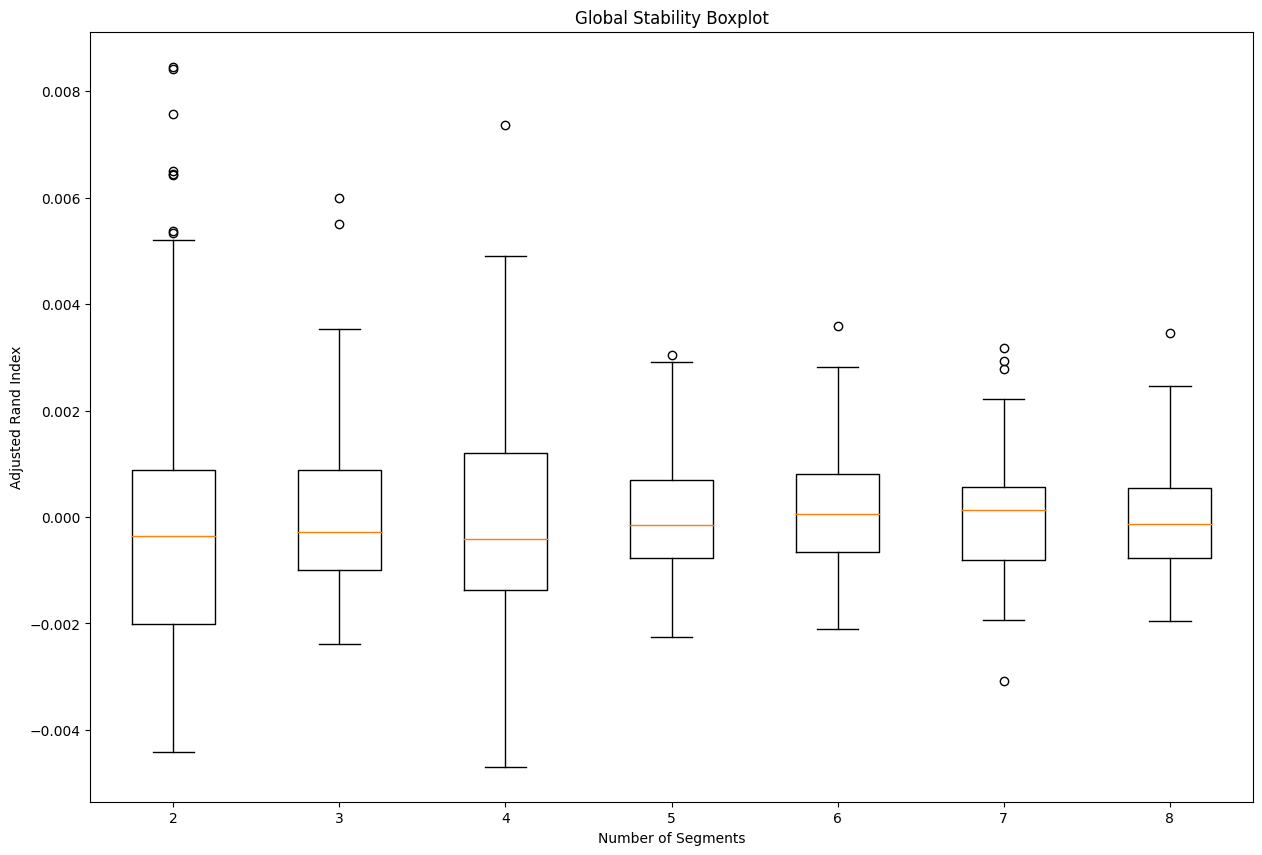

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

# Set the random seed
np.random.seed(1234)


# Define the number of segments to analyze
n_segments_range = range(2, 9)

# Number of bootstrap samples and random initializations
n_boot_samples = 100
n_restarts = 10

# Initialize lists to store stability scores
stability_scores = []

for n_segments in n_segments_range:
    segment_stability_scores = []

    for _ in range(n_boot_samples):
        # Bootstrap resampling of the data
        boot_sample = resample(mtx, random_state=np.random.randint(0, 1000))

        # Perform k-Means clustering with random initializations
        kmeans = KMeans(n_clusters=n_segments, n_init=n_restarts, random_state=np.random.randint(0, 1000))
        kmeans.fit(boot_sample)

        # Calculate the Adjusted Rand Index as a stability measure
        ari = adjusted_rand_score(kmeans.labels_, kmeans.predict(mtx))
        segment_stability_scores.append(ari)

    stability_scores.append(segment_stability_scores)

# Plot a boxplot to visualize the global stability
plt.boxplot(stability_scores, labels=n_segments_range)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Boxplot')
plt.show()


Getting optimal value of k in KMeans using Distortion score & Elbow


In [ ]:
from sklearn.decomposition import PCA
from bioinfokit.visuz import cluster
import rdflib


from yellowbrick.cluster import KElbowVisualizer

# Define the range of cluster numbers to consider
cluster_range = range(1, 7)

# Create a KMeans model for the elbow visualizer

model = KMeans()

# Create the KElbowVisualizer
visualizer = KElbowVisualizer(model, k=cluster_range)

# Fit the visualizer to your data (replace 'your_data' with your dataset)
visualizer.fit(rdf)

# Visualize the distortion and find the elbow point
visualizer.show()


ModuleNotFoundError: ignored

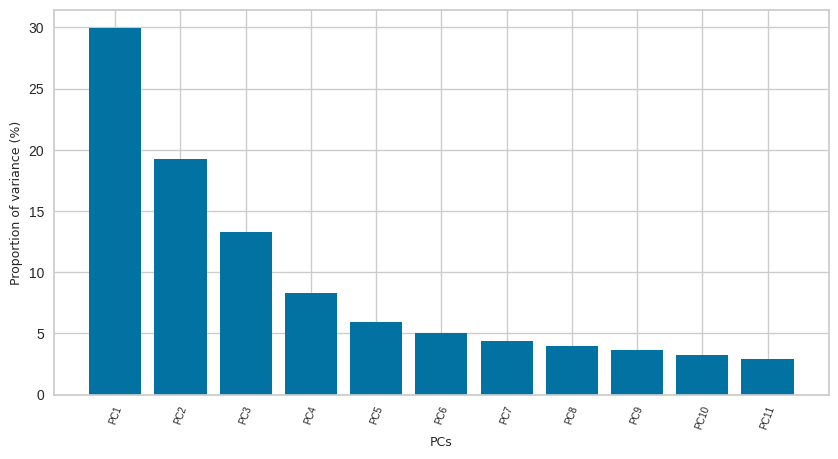

In [ ]:
#Scree plot (Elbow test)- PCA

from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))


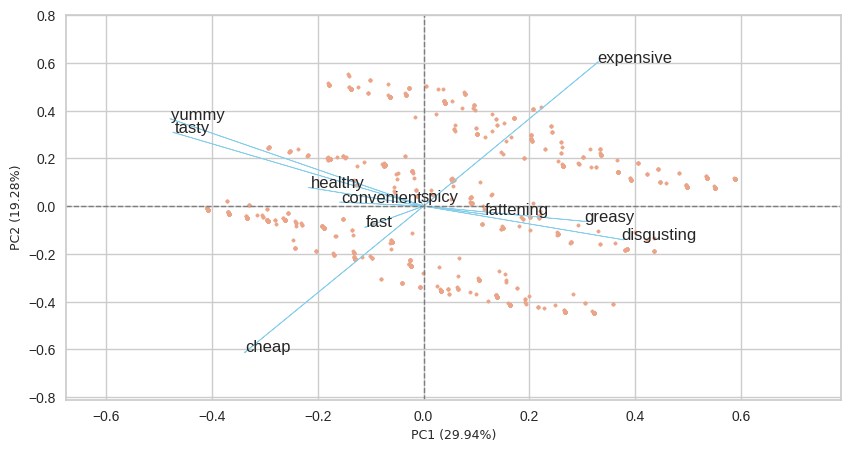

In [ ]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))
